In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Adding some data set 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

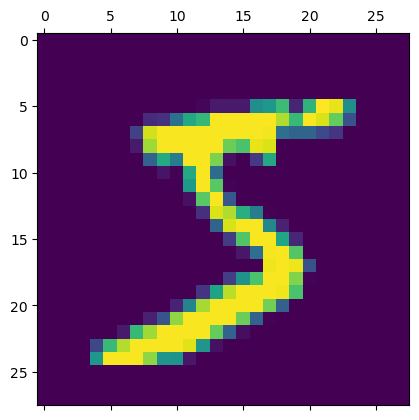

In [4]:
plt.matshow(x_train[0])

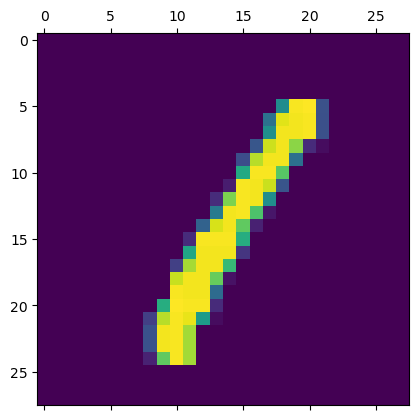

In [5]:
plt.matshow(x_train[3])

In [6]:
y_train[:5]
y = x_train[3]
y

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# flating the trainand test data.
xf_train = x_train.reshape(len(x_train), 28*28)
xf_test = x_test.reshape(len(x_test), 28*28)

xf_train.shape, xf_test.shape

((60000, 784), (10000, 784))

## Building the Model

In [8]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=10, activation="sigmoid", name="layer1")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
L1_num_params = (28*28) * 10 + 10
print(f"L1_num_params = {L1_num_params}")

L1_num_params = 7850


Size * Units + Units = Params

### compiling the model

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

### Random Weights before model fit

In [11]:
w, b = model.get_weights()
print(f"w.shape = {w.shape}:\n{w}\n\n b.shape = {b.shape}:\n{b}")

w.shape = (784, 10):
[[-0.02036515  0.03390111 -0.06601685 ...  0.05802452  0.00613449
  -0.02848567]
 [ 0.07836976 -0.02274276 -0.05794188 ...  0.00927331 -0.00250685
   0.03729785]
 [ 0.0165731   0.03976823  0.05549585 ... -0.0378115   0.05158602
  -0.00872014]
 ...
 [ 0.04843735  0.03477792  0.07434132 ...  0.0850702  -0.01029151
   0.03360848]
 [ 0.04327165 -0.06559891  0.01704952 ... -0.05553967  0.04908177
   0.03363626]
 [-0.07681978  0.06156621  0.00429636 ...  0.05793216 -0.04225034
  -0.05237265]]

 b.shape = (10,):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# Without Scaling the data
model.fit(xf_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 45.0441 - accuracy: 0.8521
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 49.7902 - accuracy: 0.8769
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 50.2003 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 50.7285 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 50.7607 - accuracy: 0.8863


In [13]:
# With scaling the data
xs_train = xf_train/255
xs_test = xf_test/255

model.fit(xs_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3921 - accuracy: 0.8899
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9230
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2526 - accuracy: 0.9288
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2451 - accuracy: 0.9317
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476 - accuracy: 0.9307


In [14]:
# As our accuracy is 93% aprox, We can increase it by adding some hidden layers: accuracy = 97% aprox
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=100, activation="sigmoid", name="layer1"),
    Dense(units=10, activation="sigmoid", name="layer2")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

model.fit(xs_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4217 - accuracy: 0.8918
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2019 - accuracy: 0.9423
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1494 - accuracy: 0.9575
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1174 - accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0958 - accuracy: 0.9732


## Predicting The Digits

In [16]:
y_predict = model.predict(xs_test)
np.argmax(y_predict[0]), y_test[0]

313/313 [==============================] - 1s 2ms/step


(7, 7)

In [17]:
np.argmax(y_predict[1]), y_test[1]

(2, 2)

In [18]:
# first 5 predicting values
for i in range(5):
    print(f"Predicted Value = {np.argmax(y_predict[i])}, Real Value = {y_test[i]}, index = {i}")

Predicted Value = 7, Real Value = 7, index = 0
Predicted Value = 2, Real Value = 2, index = 1
Predicted Value = 1, Real Value = 1, index = 2
Predicted Value = 0, Real Value = 0, index = 3
Predicted Value = 4, Real Value = 4, index = 4


## Let's Creating a confuse matrix for our model

In [19]:
y_predict_label = [np.argmax(i) for i in y_predict]
mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)

In [20]:
mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    2,    0,    3,    2,    1,    1,    0],
       [   0, 1117,    5,    0,    0,    1,    3,    2,    7,    0],
       [   7,    0,  998,    4,    2,    0,    3,    8,    9,    1],
       [   0,    0,    5,  981,    1,    3,    0,   11,    5,    4],
       [   1,    0,    8,    1,  948,    0,    3,    3,    2,   16],
       [   3,    1,    0,   12,    2,  854,    6,    1,   10,    3],
       [   8,    2,    3,    1,    5,    5,  929,    0,    5,    0],
       [   1,    4,   10,    5,    1,    1,    0,  995,    2,    9],
       [   3,    2,    4,    8,    4,    5,    4,    4,  938,    2],
       [   4,    6,    1,    9,   13,    6,    0,    5,    3,  962]])>

Here we can see that the diagonal elements are predicted same as the real element
And other element specifies how many time a predicted value predict other number then the truth number